In [1]:
import os
import netCDF4 as nc
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from osprey.utils.folders import folders

ModuleNotFoundError: No module named 'sklearn'

In [5]:
# Open the NetCDF file
expname = "FE00"
var = "tn"
endleg = 11
dirs = folders(expname)
filename = os.path.join(dirs['tmp'], str(endleg).zfill(3), expname + '_*_' + 'restart.nc')
data = xr.open_mfdataset(filename, use_cftime=True)

In [17]:
# Extract variable
temp = data[var].isel(time_counter=0,nav_lev=0).values
# Flatten variable
temp_flat = temp.flatten().reshape(-1, 1)
# Apply k-means clustering
n_clusters = 4  # Define the number of clusters
kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=0).fit(temp_flat)
clusters = kmeans.labels_.reshape(temp.shape)

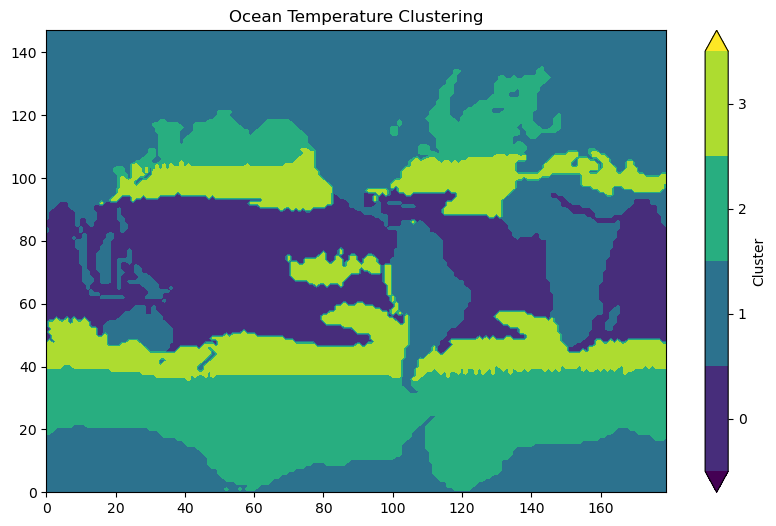

In [18]:
# Plot the clustered regions
plt.figure(figsize=(10, 6))
plt.contourf(clusters, cmap='viridis', levels=np.arange(n_clusters + 1) - 0.5, extend='both')
plt.colorbar(ticks=np.arange(n_clusters), label='Cluster')
plt.title('Ocean Temperature Clustering')
plt.show()

In [ ]:
# open issues:
# obtain the domain of the sub-regions: using a mask field
# include the dynamics to recreate ocean basins
# include depth, reconstruct the vertical structure (mixed, pycno, abyss)
# develop a criterion to determine the optimal number of provinces (following longhurst?)